# Важность признаков

*Подключаем библиотеки*:

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

*загружаем табличку*

In [2]:
import zipfile

In [3]:
with zipfile.ZipFile('../../Body/3Results/AllGenesCodonUsageNoOverlap.txt.zip') as f:
    f.extractall('../..')

In [4]:
data = pd.read_csv('../../Body/3Results/AllGenesCodonUsageNoOverlap.txt', sep='\t')

In [5]:
data.head()

,Species,Gene,GeneStart,GeneEnd,CodonsToDeleteInTheBeginning,CodonsToDeleteAtTheEnd,AminoNoOverlap,CodonsNoOverlap,AAA,AAC,...,TTA,TTC,TTG,TTT,NeutralA,NeutralT,NeutralG,NeutralC,Taxonomy,Class
0,Abalistes_stellaris,ND1,2856,3831,0,0,MISTLITHVISPLAFIVPILLAVAFLTLVERKVLGYMQLRKGPNVV...,ATGATCTCAACCCTTATTACCCACGTGATCTCCCCCCTGGCTTTCA...,7,4,...,8,13,1,9,79,23,16,66,Eukaryota_Metazoa_Chordata_Craniata_Vertebrata...,Actinopterygii
1,Abalistes_stellaris,ND2,4047,5092,0,0,MSPYILATLLFSLGLGTTITFMSSHWLLAWMGLEINTLAIIPLMTH...,ATGAGTCCTTACATCTTAGCCACCTTACTATTCAGCTTAGGCTTAG...,7,8,...,15,7,1,4,77,33,12,83,Eukaryota_Metazoa_Chordata_Craniata_Vertebrata...,Actinopterygii
2,Abalistes_stellaris,COX1,5483,7034,0,0,AITRWFFSTNHKDIGTLYLIFGAWAGMVGTALSLLIRAELSQPGAL...,GCAATTACACGTTGATTCTTCTCAACTAACCATAAAGACATCGGCA...,8,3,...,13,22,2,19,115,71,19,74,Eukaryota_Metazoa_Chordata_Craniata_Vertebrata...,Actinopterygii
3,Abalistes_stellaris,COX2,7188,7879,0,0,MAHPSQLGFQDAASPVMEELLHFHDHALMIVFLISTLVLYIIVAMV...,ATGGCCCATCCCTCACAACTAGGATTTCAAGATGCAGCCTCACCTG...,2,4,...,4,4,0,5,52,23,6,40,Eukaryota_Metazoa_Chordata_Craniata_Vertebrata...,Actinopterygii
4,Abalistes_stellaris,ATP8,7955,8123,0,4,MPQLNPAPWFAILVFSWLVFLIVLPPKVMAHVFPNESSPQSTEKPK...,ATGCCCCAGCTCAACCCTGCACCATGATTTGCTATTCTAGTTTTCT...,3,2,...,1,2,0,2,23,5,0,11,Eukaryota_Metazoa_Chordata_Craniata_Vertebrata...,Actinopterygii


Операции с табличкой как были в скрипте на R

In [6]:
NotND6 = data[data.Gene != 'ND6']
ND6 = data [data.Gene == 'ND6']

A = ND6.NeutralT
C = ND6.NeutralG
G = ND6.NeutralC
T = ND6.NeutralA

ND6.NeutralA = A
ND6.NeutralC = C
ND6.NeutralG = G
ND6.NeutralT = T

data = pd.concat([ND6, NotND6])

/usr/local/lib/python3.7/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


*Группировка по суммам:*

In [7]:
agg = data.groupby([data.Species, data.Class, data.Gene]).sum()[['NeutralA','NeutralT', 'NeutralG', 'NeutralC']]

In [8]:
agg = agg.reset_index()

In [9]:
agg['CTSkew'] = (agg.NeutralC- agg.NeutralT) / (agg.NeutralC + agg.NeutralT)  
agg['CGSkew'] = (agg.NeutralC- agg.NeutralG) / (agg.NeutralG + agg.NeutralC)  
agg['CASkew'] = (agg.NeutralC- agg.NeutralA) / (agg.NeutralC + agg.NeutralA)  
agg['TGSkew'] = (agg.NeutralT- agg.NeutralG) / (agg.NeutralT + agg.NeutralG)  

agg['TASkew'] = (agg.NeutralT- agg.NeutralA) / (agg.NeutralA + agg.NeutralT)  
agg['GASkew'] = (agg.NeutralG- agg.NeutralA) / (agg.NeutralG + agg.NeutralA) 


# AGG$CTSkew = (AGG$NeutralC - AGG$NeutralT)/(AGG$NeutralC + AGG$NeutralT); summary(AGG$CTSkew) # GA on heavy
# AGG$CGSkew = (AGG$NeutralC - AGG$NeutralG)/(AGG$NeutralC + AGG$NeutralG); summary(AGG$CGSkew) # 
# AGG$CASkew = (AGG$NeutralC - AGG$NeutralA)/(AGG$NeutralC + AGG$NeutralA); summary(AGG$CASkew) # 
# AGG$TGSkew = (AGG$NeutralT - AGG$NeutralG)/(AGG$NeutralT + AGG$NeutralG); summary(AGG$TGSkew) # 
# AGG$TASkew = (AGG$NeutralT - AGG$NeutralA)/(AGG$NeutralT + AGG$NeutralA); summary(AGG$TASkew) # 
# AGG$GASkew = (AGG$NeutralG - AGG$NeutralA)/(AGG$NeutralG + AGG$NeutralA); summary(AGG$GASkew) # 

*Длительность жизни животных:*

In [10]:
mammals_long_data = pd.read_csv('../../Body/1Raw/GenerationLenghtforMammals.xlsx.txt', sep='\t')

In [11]:
mammals_long_data.Scientific_name = mammals_long_data.Scientific_name.str.replace(' ', '_')

In [12]:
mammals_long_data.head()

,Genus,Scientific_name,AdultBodyMass_g,Sources_AdultBodyMass,Max_longevity_d,Sources_Max_longevity,Rspan_d,AFR_d,Data_AFR,Calculated_GL_d,GenerationLength_d,Sources_GL
0,Eligmodontia,Eligmodontia_typus,17.37,PanTHERIA,292,PanTHERIA,254.64,73.74,calculated,147.5856,147.585600,Rspan-AFR(SM+Gest)
1,Microtus,Microtus_oregoni,20.35,PanTHERIA,456.25,PanTHERIA,445.85,58.06,calculated,187.3565,187.356500,Rspan-AFR(SM+Gest)
2,Peromyscus,Peromyscus_gossypinus,27.68,PanTHERIA,471.45833335,PanTHERIA,444.87833335,72.58,calculated,201.59471667,201.594717,Rspan-AFR(SM+Gest)
3,Elephantulus,Elephantulus_myurus,59.51,PanTHERIA,401.5,PanTHERIA,412.34,90.48,calculated,210.0586,210.058600,Rspan-AFR(SM+Gest)
4,Peromyscus,Peromyscus_boylii,23.90,PanTHERIA,547.5,PanTHERIA,514.13,79.97,calculated,229.0677,229.067700,Rspan-AFR(SM+Gest)


Объединенная табличка:

In [13]:
data = pd.merge(agg, mammals_long_data, left_on=agg.Species, right_on=mammals_long_data.Scientific_name)

In [14]:
data.drop('key_0', axis=1, inplace=True)

In [15]:
data.head()

,Species,Class,Gene,NeutralA,NeutralT,NeutralG,NeutralC,CTSkew,CGSkew,CASkew,...,AdultBodyMass_g,Sources_AdultBodyMass,Max_longevity_d,Sources_Max_longevity,Rspan_d,AFR_d,Data_AFR,Calculated_GL_d,GenerationLength_d,Sources_GL
0,Acinonyx_jubatus,Mammalia,ATP6,48,28,7,25,-0.056604,0.562500,-0.315068,...,50577.92,PanTHERIA,7117.5,PanTHERIA;AnAge;Carn_Ung,5900.23,1217.27,PanTHERIA,2928.3367,2190.0,GMA
1,Acinonyx_jubatus,Mammalia,ATP8,26,3,2,3,0.000000,0.200000,-0.793103,...,50577.92,PanTHERIA,7117.5,PanTHERIA;AnAge;Carn_Ung,5900.23,1217.27,PanTHERIA,2928.3367,2190.0,GMA
2,Acinonyx_jubatus,Mammalia,COX1,113,81,19,53,-0.208955,0.472222,-0.361446,...,50577.92,PanTHERIA,7117.5,PanTHERIA;AnAge;Carn_Ung,5900.23,1217.27,PanTHERIA,2928.3367,2190.0,GMA
3,Acinonyx_jubatus,Mammalia,COX2,48,24,10,26,0.040000,0.444444,-0.297297,...,50577.92,PanTHERIA,7117.5,PanTHERIA;AnAge;Carn_Ung,5900.23,1217.27,PanTHERIA,2928.3367,2190.0,GMA
4,Acinonyx_jubatus,Mammalia,COX3,64,25,6,40,0.230769,0.739130,-0.230769,...,50577.92,PanTHERIA,7117.5,PanTHERIA;AnAge;Carn_Ung,5900.23,1217.27,PanTHERIA,2928.3367,2190.0,GMA


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8450 entries, 0 to 8449
Data columns (total 25 columns):
Species                  8450 non-null object
Class                    8450 non-null object
Gene                     8450 non-null object
NeutralA                 8450 non-null int64
NeutralT                 8450 non-null int64
NeutralG                 8450 non-null int64
NeutralC                 8450 non-null int64
CTSkew                   8450 non-null float64
CGSkew                   8450 non-null float64
CASkew                   8450 non-null float64
TGSkew                   8448 non-null float64
TASkew                   8450 non-null float64
GASkew                   8450 non-null float64
Genus                    8450 non-null object
Scientific_name          8450 non-null object
AdultBodyMass_g          8450 non-null float64
Sources_AdultBodyMass    8450 non-null object
Max_longevity_d          8450 non-null object
Sources_Max_longevity    8450 non-null object
Rspan_d         

In [17]:
data.drop('Class', axis=1, inplace=True)

В таблице оказалось несколько nan из-за того, что у кого-то количество NeutralT и NeutralG одинаково.

In [18]:
data = data.dropna()

Сформировали данные для модели:

In [19]:
X = data[['CTSkew', 'CGSkew', 'CASkew', 'TGSkew', 'TASkew', 'GASkew']]
y = np.log1p(data.GenerationLength_d)

отнормировали:

In [20]:
X_std = StandardScaler().fit_transform(X)

Делаем регрессор на основе случайного леса, параметр количества деревьев ставим от балды:

In [21]:
rfr = RandomForestRegressor(n_estimators=500)

получили оценку качества работы первого попавшегося леса:

In [22]:
scores = cross_val_score(rfr, X_std, y,cv=10,scoring='neg_mean_absolute_error')

In [23]:
scores.mean()

-0.6063013233192356

Теперь обучимся на всех данных:

In [24]:
rfr.fit(X_std, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

И получим вот такой график важности признаков:

Text(0.5, 1.0, 'log longetivity feature importance')

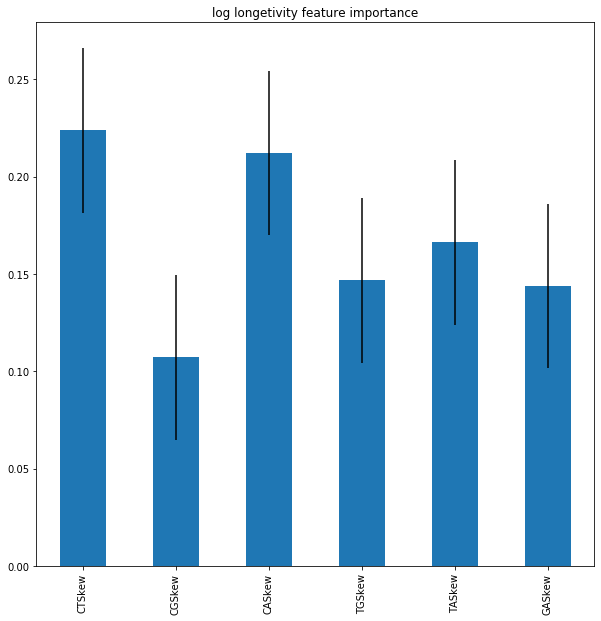

In [25]:
std = np.std([ tree.feature_importances_ for tree in rfr.estimators_])

plt.figure(figsize=(10,10))
pd.Series(rfr.feature_importances_,['CTSkew', 'CGSkew', 'CASkew', 'TGSkew', 'TASkew', 'GASkew']).plot(kind='bar', yerr=std)
plt.title('log longetivity feature importance')
#plt.savefig('feature_importances.png')

В общем-то для довольно неплохого качества модели получили важности признаков.
Теперь попробуем максимально подогнать модель под данные, описав стратегию рандомизированного поиска в пространстве параметров.

In [26]:
from scipy.stats import randint

In [27]:
param_distr = {'n_estimators':randint(5, 750),
              'max_depth': [None] + [1,5,6, 7, 10],
              'oob_score':[True, False]}

In [28]:
searcher = RandomizedSearchCV(rfr, param_distributions=param_distr, scoring='neg_mean_absolute_error', n_jobs=-1,cv=10, verbose=2,n_iter=25)

In [29]:
searcher.fit(X_std, y)

Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   23.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  3.6min finished


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=500,
                                                   n_jobs=None, oob_score=False,
                                                   random_state=Non

Обучились вот до этого качества:

In [30]:
searcher.best_score_

-0.5768352122615761

In [31]:
searcher.best_params_

{'max_depth': 7, 'n_estimators': 577, 'oob_score': False}

Вот это уже взаимосвязи между именно X и y.

Text(0.5, 1.0, 'log longetivity feature importane')

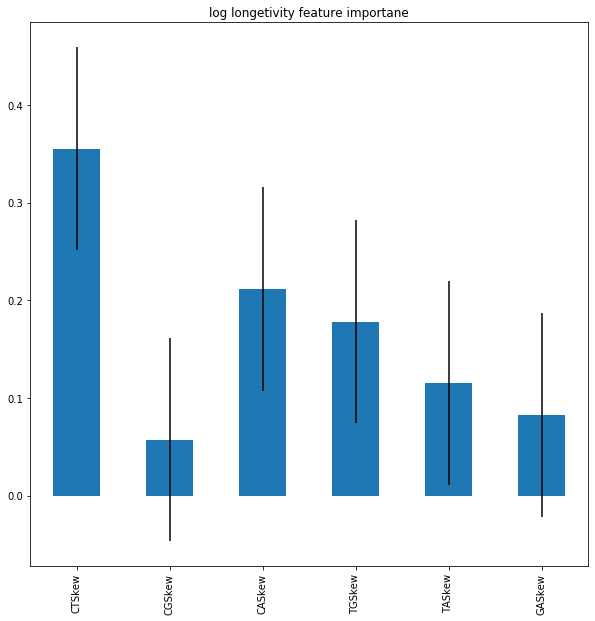

In [32]:
plt.figure(figsize=(10,10))
pd.Series(searcher.best_estimator_.feature_importances_,
          ['CTSkew', 'CGSkew', 'CASkew', 'TGSkew', 'TASkew', 'GASkew']).plot(kind='bar', 
                                                                             yerr = np.std([ tree.feature_importances_ for tree in searcher.best_estimator_.estimators_]))
plt.title('log longetivity feature importane')
#plt.savefig('feature_importances.png')

Итого, если хотим более общие закономерности - выбираем первый график и менее обученный лес, если хотим деталей в данных - второй график и переобученный лес.